# Escalamiento de datos numéricos

### Transformaciones lineales

In [65]:
import timeit #medir el performance de los modelos
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets,linear_model

X,y=datasets.load_diabetes(return_X_y=True)
raw=X[:,None,2] #columna[2] todas las filas en formato 442,1


(442, 1)


Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

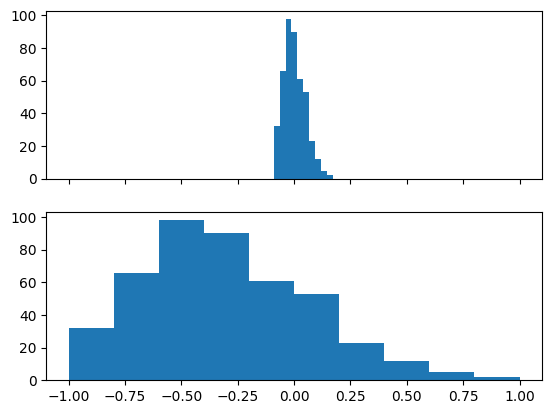

In [70]:
#Reglas de escalamiento
#max-min 

max_raw = max(raw)
min_raw= min(raw)

scaled=(2*raw - max_raw-min_raw)/(max_raw-min_raw)

fin,axs = plt.subplots(2,1, sharex=True)

axs[0].hist(raw)
axs[1].hist(scaled)

In [79]:
#modelos para entrenamiento

def train_raw():
    linear_model.LinearRegression().fit(raw,y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled,y)
 


In [80]:
raw_time=timeit.timeit(train_raw,number = 100)
scaled_time = timeit.timeit(train_scaled,number = 100)
print('train raw: {}'.format(raw_time))
print('train scaled: {}'.format(scaled_time))

train raw: 0.030244908994063735
train scaled: 0.02623898908495903


* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

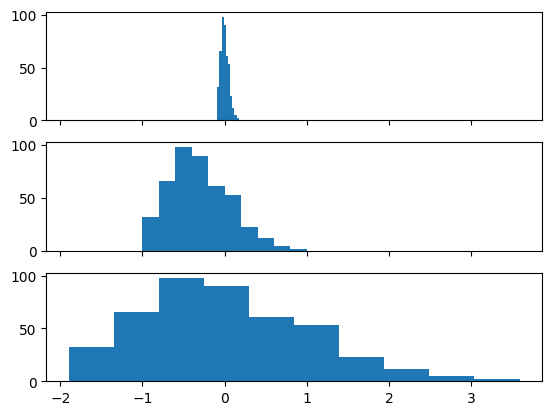

In [82]:
#normalización Z-score

avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std


fin,axs = plt.subplots(3,1, sharex=True)

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)

In [83]:
def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled,y)

z_scaled_time=timeit.timeit(train_z_scaled,number = 100)

print('train raw: {}'.format(raw_time))
print('train scaled: {}'.format(scaled_time))
print('train z scaled: {}'.format(z_scaled_time))

train raw: 0.030244908994063735
train scaled: 0.02623898908495903
train z scaled: 0.028464841190725565


### Transformaciones no lineales

In [85]:
df=pd.read_csv('cars.csv')
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


<AxesSubplot: >

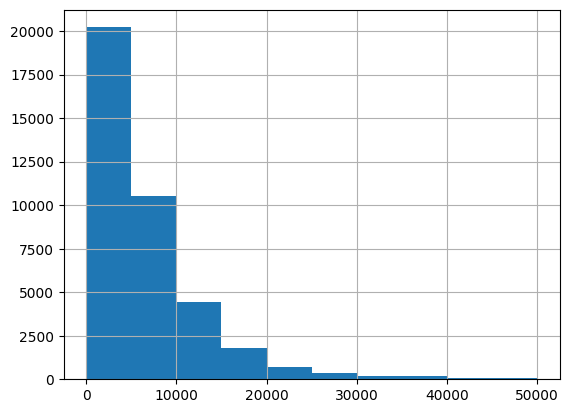

In [86]:
df.price_usd.hist()

Transformación con $$tanh(x)$$

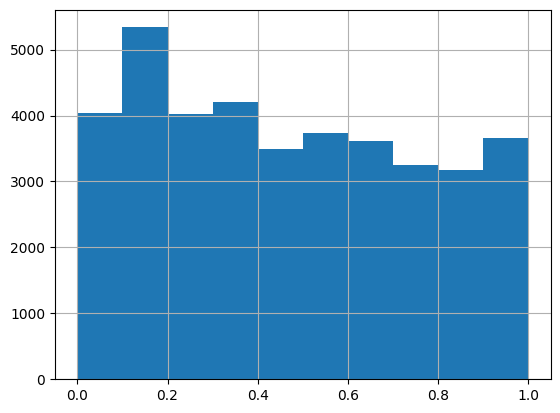

In [96]:
p=10000
hola=df.price_usd.apply(lambda x: np.tanh(x/p)).hist()



* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=05b38c36-33cb-4614-a77b-8648642fb8a0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>